### Assignment #3: Supervised Machine Learning

First we import required modules and load the data from the .json file to a Pandas DataFrame. We inspect the DataFrame object to determine its properties. 

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from datetime import datetime
data = pd.read_json("Assignment_03/reviews.json") # Data import 
data['date'] = data['date'].apply(lambda x: datetime.fromordinal(x)) # Date conversion
data.head(4)

,author,body,date,helpful,stars,style,title
0,Gene H.,We were looking for a decent flashlight for ou...,2018-04-11,0,5,LED Flashlight 2P,Great range for a small package
1,Cwazy Wabbit,"Very nice, works great",2018-04-11,0,5,LED Flashlight 2P,Five Stars
10,David C. Bradford,Sturdy little lights that work every time as a...,2018-04-10,0,5,LED Flashlight 2P,Sturdy little lights that work every time as
100,MDD,I bought 2 and they worked great for 2-3 weeks...,2018-03-09,0,1,LED Flashlight 2P,I bought 2 and they worked great for 2-3 weeks...


The dataframe is of the shape `(833, 7)` and its axes are: `['author', 'body', 'date', 'helpful', 'stars', 'style', 'title']`.
Lets now try to create a simple bag-of-words binary-classification model for the data. 

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
body_list = data['body'].tolist()
rating_list = data['stars'].tolist()
x_train, x_test, y_train, y_test = train_test_split(body_list, rating_list, test_size=0.2, random_state=1)
vectorizer = CountVectorizer(lowercase=True, strip_accents='ascii', stop_words='english', min_df=0.01, max_df=0.9, binary=True)
vectorizer = vectorizer.fit(x_train)
x_train = vectorizer.transform(x_train) #just do .toarray() here?
x_test = vectorizer.transform(x_test)
total_word_counts = [sum(word_count) for word_count in zip(*x_train.toarray())]
word_frequencies = dict(zip(vectorizer.get_feature_names(), total_word_counts))
most_frequent_term = max(word_frequencies, key = word_frequencies.get)
print("The most frequent term is '" + most_frequent_term + "' and it occurs " + str(word_frequencies[most_frequent_term]) + " times in the training corpus.")

The most frequent term is 'bright' and it occurs 218 times in the training corpus.


Overall, we can say that the L1 regression was superior to the L2 regression in terms of accuracy and number of variables used. Confusion matrixes for these were very similar and uninteresting. I did not include them for aesthetic reasons. 

Now we shall attempt to plot some data points, despite rampant issues with python plotting in Pycharm and within iPython Notebooks.

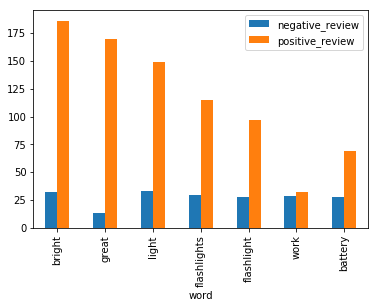

In [5]:
# import plotly.plotly as py
# import cufflinks as cf
# from plotly.graph_objs import *
top_indexes = [i for i, x in enumerate(y_train) if x>=4]
bot_indexes = [i for i, x in enumerate(y_train) if x<4]
top_reviews = x_train.toarray()[top_indexes]
bot_reviews = x_train.toarray()[bot_indexes]
top_word_counts = [sum(word_count) for word_count in zip(*top_reviews)]
bot_word_counts = [sum(word_count) for word_count in zip(*bot_reviews)]
top_bot_word_counts = pd.DataFrame({"word": vectorizer.get_feature_names(), "positive_review": top_word_counts, "negative_review": bot_word_counts})
import matplotlib.pyplot as plt
top_bot_most = top_bot_word_counts.sort_values('positive_review')[-5:][::-1].append(top_bot_word_counts.sort_values('negative_review')[-5:][::-1]).set_index('word')
top_bot_most.drop_duplicates().plot.bar()
# a = top_bot_word_counts.sort_values('top', ascending=False)[:5].set_index('word')
# b = top_bot_word_counts.sort_values('bot', ascending=False)[:5].set_index('word')
# a.append(b).drop_duplicates().plot.bar()
# top_bot_word_counts.sort_values('top', ascending=False)[:5].iplot(kind='bar', filename='cufflinks/grouped-bar-chart') #'jupyter/styled_bar'
# top_bot_word_counts.sort_values('top', ascending=False)[:5].iplot(kind='bar', filename='jupyter/styled_bar') 

Now we apply several different simple regressions and evaluate their properties.

In [6]:
from sklearn.linear_model import LogisticRegression
binary_train = [1 if x >=4 else 0 for x in y_train]
binary_test = [1 if x >=4 else 0 for x in y_test]
lr1 = LogisticRegression(penalty='l1')
lr2 = LogisticRegression(penalty='l2')
lr1.fit(x_train, binary_train); lr2.fit(x_train, binary_train)
words_used1 = len(lr1.coef_[0]) - lr1.coef_[0].tolist().count(0)
words_used2 = len(lr2.coef_[0]) - lr2.coef_[0].tolist().count(0)
print(str(words_used1)+' words used in the L1 regression w/ accuracy: '+
      str(round(100 * lr1.score(x_test, binary_test), 2))+'%, '+
      str(words_used2)+' words used in the L2 regression w/ accuracy: '+
      str(round(100 * lr2.score(x_test, binary_test), 2)))

84 words used in the L1 regression w/ accuracy: 84.43%, 227 words used in the L2 regression w/ accuracy: 83.83


Overall, we can say that the L1 regression was superior to the L2 regression in terms of accuracy and number of variables used. Confusion matrixes for these were very similar and uninteresting. I did not include them for aesthetic reasons. 

Now we can try for a more robust estimator. To do this, I wanted to transform more data from the scraping into numeric variables to imput into my new model. For the style of the item reviewed, I encoded the labels as integers. For the author variable, there were a number of things I could have done with this, but I decided to check if the author was logged in or was reviewing as an anonymous 'Amazon Customer', this was stored as a binary variable. I was going to incorporate the title into the model as an input variable, however, I first checked if there were any blantant givaways and as it turns out, nearly 1/3rd of the titles explicitly mentioned the number of stars the review had. Being a frequent user of Amazon I was aware that lazy reviewers sometimes just write the number of stars they gave it as a title. Ultimately I felt that using the title to predict ratings would thus be unfair. 

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data['style'])
data['style'] = le.transform(data['style'])
data['author'] = [1 if x=='Amazon Customer' else 0 for x in data['author']]
round(100*sum([1 if 'stars' in x.lower() else 0 for x in data['title']])/len(data['title']),2)

29.77